In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:

# Load dataset
df = pd.read_csv("../data/metadata.csv")

# Inspect dataset
print("Shape:", df.shape)
print(df.info())
print(df.head())

# Missing values
print(df.isnull().sum().head(20))

# Basic stats
print(df.describe())

/var/folders/p8/4g8p6x8n5vggk5nkxntqx3yc0000gn/T/ipykernel_13390/1605980209.py:2: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/metadata.csv")


Shape: (1056660, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non

In [3]:
# Part 2: Data Cleaning and Preparation
# Handle missing publication dates
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df = df.dropna(subset=['publish_time'])

# Extract year
df['year'] = df['publish_time'].dt.year

# Abstract word count
df['abstract_word_count'] = df['abstract'].fillna("").apply(lambda x: len(x.split()))


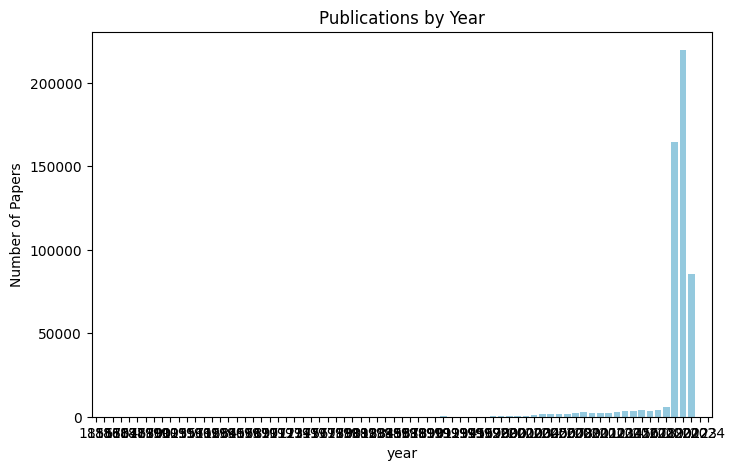

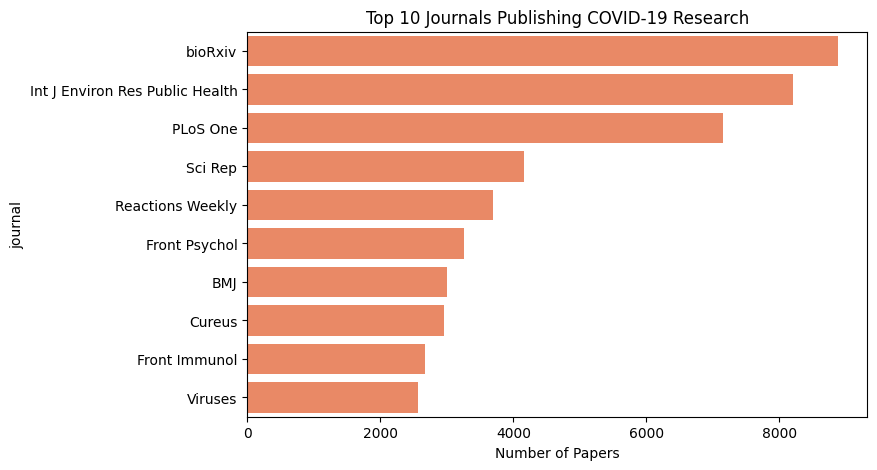

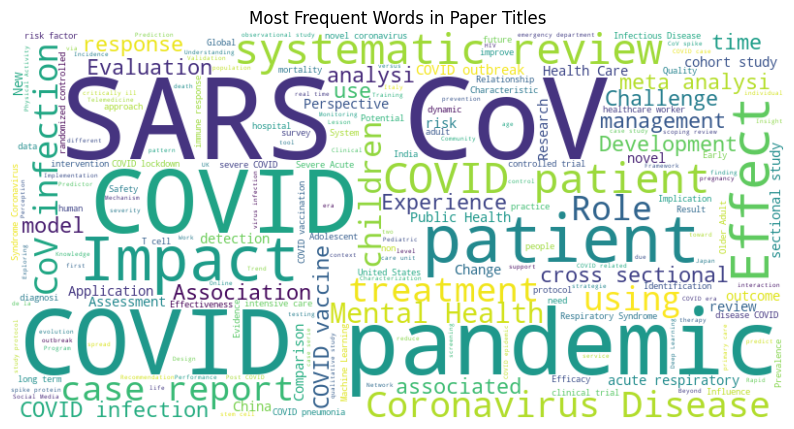

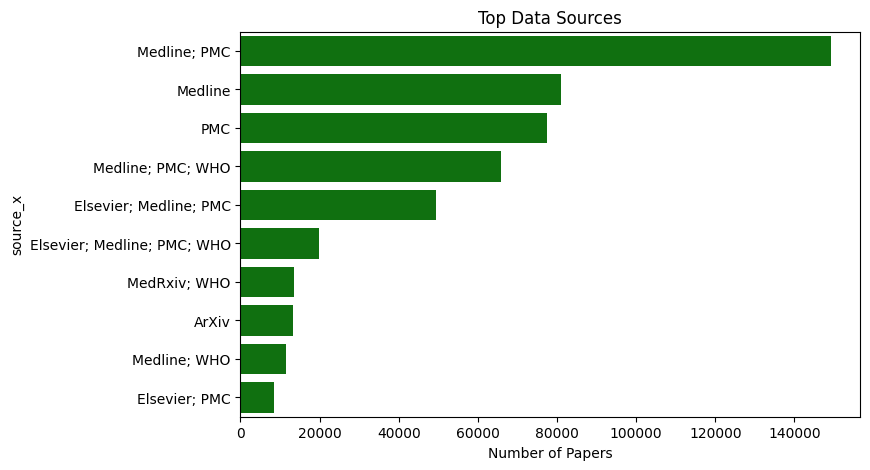

In [4]:
# Part 3: Analysis & Visualization

# 1. Papers by Year
year_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(8,5))
sns.barplot(x=year_counts.index, y=year_counts.values, color="skyblue")
plt.title("Publications by Year")
plt.ylabel("Number of Papers")
plt.show()

# 2. Top Journals
top_journals = df['journal'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(y=top_journals.index, x=top_journals.values, color="coral")
plt.title("Top 10 Journals Publishing COVID-19 Research")
plt.xlabel("Number of Papers")
plt.show()

# 3. Word Cloud from Titles
text = " ".join(df['title'].dropna().astype(str))
wc = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Paper Titles")
plt.show()

# 4. Distribution by Source
source_counts = df['source_x'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(y=source_counts.index, x=source_counts.values, color="green")
plt.title("Top Data Sources")
plt.xlabel("Number of Papers")
plt.show()
